In [1]:
#assigning patients to a "good" or "bad" outcome class and turn this into a classification problem.
import pandas as pd
import os

In [2]:
radiomics_path = "D:\work\ingham-medphys-coding-master\ingham-medphys-coding-master\data\HN_Radiomics.csv"
clinical_data_path = "D:\work\ingham-medphys-coding-master\ingham-medphys-coding-master\data\HN_ClinicalData.csv"

In [3]:
#Prepare all the data into the data framework
df_clinical_data=pd.read_csv(clinical_data_path)
df_radiomics=pd.read_csv(radiomics_path)
#attact GTV data
df_gtv_radiomics = df_radiomics[df_radiomics["Structure"].str.startswith("GTV")]
df_gtv_radiomics = df_gtv_radiomics.groupby("id")[["VoxelVolume", "SurfaceArea"]].sum()
#merge data into the clininal data
df = df_clinical_data.merge(df_gtv_radiomics, on="id")

In [4]:
Train_Data=df[df["dataset"]=="train"]
Test_Data=df[df["dataset"]=="test"]

In [5]:
Train_Data.info()
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 136
Data columns (total 30 columns):
id                                                102 non-null object
dataset                                           102 non-null object
index_tumour_location                             102 non-null object
age_at_diagnosis                                  102 non-null int64
biological_sex                                    102 non-null object
performance_status_ecog                           96 non-null float64
overall_hpv_p16_status                            59 non-null object
clin_t                                            102 non-null int64
clin_n                                            102 non-null int64
clin_m                                            102 non-null int64
ajcc_stage                                        102 non-null object
pretreat_hb_in_mmolperlitre                       62 non-null float64
cancer_surgery_performed                          102 non-nu

In [5]:
import numpy as np
np.mean(df["overall_survival_in_days"])
#to transfer the problem into the classification problem (the mean of the overall_survival_in_days is near 5 years)
#overall_survival_data>1825 is good, otherwise is bad
for i, row in df.iterrows():
    if df.at[i,'overall_survival_in_days']>1825:
        df.at[i,'overall_survival_in_days'] = 1
    else: 
        df.at[i,'overall_survival_in_days'] = 0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 30 columns):
id                                                137 non-null object
dataset                                           137 non-null object
index_tumour_location                             137 non-null object
age_at_diagnosis                                  137 non-null int64
biological_sex                                    137 non-null object
performance_status_ecog                           127 non-null float64
overall_hpv_p16_status                            81 non-null object
clin_t                                            137 non-null int64
clin_n                                            137 non-null int64
clin_m                                            137 non-null int64
ajcc_stage                                        137 non-null object
pretreat_hb_in_mmolperlitre                       83 non-null float64
cancer_surgery_performed                          137 non-n

In [41]:
Train_Data=df[df["dataset"]=="train"]
Test_Data=df[df["dataset"]=="test"]

In [42]:
Train_Data['overall_survival_in_days'].head()

0    1
2    1
3    1
4    1
5    0
Name: overall_survival_in_days, dtype: int64

In [43]:
#Data cleaning, fill null, delete null and object data to int
df_Train_Data = Train_Data.drop(['overall_hpv_p16_status', 'pretreat_hb_in_mmolperlitre'],axis=1)
df_Test_Data = Test_Data.drop(['overall_hpv_p16_status', 'pretreat_hb_in_mmolperlitre'],axis=1)
df_train=df_Train_Data.dropna()
df_test=df_Test_Data.dropna()

In [44]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 136
Data columns (total 28 columns):
id                                                96 non-null object
dataset                                           96 non-null object
index_tumour_location                             96 non-null object
age_at_diagnosis                                  96 non-null int64
biological_sex                                    96 non-null object
performance_status_ecog                           96 non-null float64
clin_t                                            96 non-null int64
clin_n                                            96 non-null int64
clin_m                                            96 non-null int64
ajcc_stage                                        96 non-null object
cancer_surgery_performed                          96 non-null object
chemotherapy_given                                96 non-null object
radiotherapy_total_treat_time                     96 non-null int64
rad

In [36]:
#transform category data into numberic data
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
cols = ('index_tumour_location', 'biological_sex', 'ajcc_stage', 'cancer_surgery_performed', 'chemotherapy_given')
# process columns, apply LabelEncoder to categorical features into numeric data
for c in cols:
    df_train[c] = labelencoder.fit_transform(df_train[c])
    df_test[c] = labelencoder.fit_transform(df_test[c])

d:\app\python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\app\python\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
x_train = df_train.drop(['id', 'dataset', 'overall_survival_in_days', 'recurrence_metastatic_free_survival_in_days', 'local_recurrence_in_days'], axis=1)
Y_train = df_train["overall_survival_in_days"]
x = x_train.values
y = Y_train.values

In [11]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#x_scaled = sc_X.fit_transform(x)
#y_scaled = sc_y.fit_transform(y.reshape(-1,1))
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [12]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [13]:
y_pred=clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9688


In [46]:
x_test = df_test.drop(['id', 'dataset', 'overall_survival_in_days', 'recurrence_metastatic_free_survival_in_days', 'local_recurrence_in_days'], axis=1)
Y_test = df_test["overall_survival_in_days"]
inputx = x_test.values
outputy = Y_test.values

In [16]:
y_pred=clf.predict(inputx)
print('Test set score: {:.4f}'.format(clf.score(inputx, outputy)))

Test set score: 0.8387


In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(outputy, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 6  3]
 [ 2 20]]

True Positives(TP) =  6

True Negatives(TN) =  20

False Positives(FP) =  3

False Negatives(FN) =  2


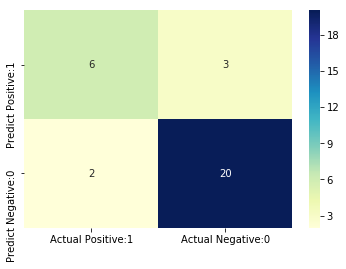

In [18]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [19]:
#more model to improve the results
from sklearn.linear_model import LogisticRegression   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import KFold

In [20]:
logre=LogisticRegression()
logre.fit(X_train, y_train)
print('Test set score: {:.4f}'.format(logre.score(inputx, outputy)))

Test set score: 0.7742


d:\app\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
dere=DecisionTreeClassifier()
dere.fit(X_train, y_train)
print('Test set score: {:.4f}'.format(dere.score(inputx, outputy)))

Test set score: 0.7742


In [38]:
Rare=RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
Rare.fit(X_train, y_train)
print('Test set score: {:.4f}'.format(Rare.score(inputx, outputy)))

Test set score: 0.8387


In [47]:
def classification_model(model, data, x_train, Y_train):
  #Fit the model:
  model.fit(x_train,Y_train)
  
  #Make predictions on training set:
  predictions = model.predict(x_train)
  
  #Print accuracy
  accuracy = accuracy_score(predictions,Y_train)
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5).split(data)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (x_train.iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = Y_train.iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(x_train.iloc[test,:], Y_train.iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(x_train,Y_train) 

In [48]:
logmodel=LogisticRegression()
classification_model(logmodel,df_train,x_train,Y_train)
predictions = logmodel.predict(x_test)
accuracy = accuracy_score(predictions,Y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

d:\app\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'none'

In [33]:
ranmodel = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(ranmodel,df_train,x_train,Y_train)
predictions = ranmodel.predict(x_test)
accuracy = accuracy_score(predictions,Y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

ValueError: could not convert string to float: 'train'

In [26]:
decmodel = DecisionTreeClassifier()
classification_model(decmodel,df_train,x_train,Y_train)
predictions = decmodel.predict(x_test)
accuracy = accuracy_score(predictions,Y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 100.000%
Cross-Validation Score : 90.000%
Cross-Validation Score : 87.105%
Cross-Validation Score : 87.895%
Cross-Validation Score : 89.605%
Cross-Validation Score : 85.368%
Accuracy : 77.419%


In [27]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, df_test,x_test,Y_test)

Accuracy : 70.968%
Cross-Validation Score : 71.429%
Cross-Validation Score : 77.381%
Cross-Validation Score : 68.254%
Cross-Validation Score : 67.857%
Cross-Validation Score : 70.952%


In [28]:
clf = lgb.LGBMClassifier()
classification_model(clf,df_train,x_train,Y_train)
predictions = clf.predict(x_test)
accuracy = accuracy_score(predictions,Y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 100.000%
Cross-Validation Score : 90.000%
Cross-Validation Score : 84.474%
Cross-Validation Score : 86.140%
Cross-Validation Score : 88.289%
Cross-Validation Score : 88.526%
Accuracy : 80.645%


In [29]:
featimp = pd.Series(ranmodel.feature_importances_).sort_values(ascending=False)
print(featimp)

20    0.180038
18    0.172027
14    0.150362
21    0.090799
22    0.070786
15    0.063434
1     0.044455
7     0.036514
5     0.032827
4     0.027389
13    0.024097
3     0.020144
17    0.019813
12    0.016606
16    0.012347
19    0.010578
10    0.008095
9     0.005176
8     0.004659
11    0.004639
0     0.002729
2     0.002486
6     0.000000
dtype: float64


In [30]:
index=featimp[:10]

In [31]:
x_train=df_train.iloc [:,featimp[:10].index]
x_test=df_test.iloc [:,featimp[:10].index]
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 136
Data columns (total 10 columns):
event_local_recurrence                       96 non-null int64
event_recurrence_metastatic_free_survival    96 non-null int64
radiotherapy_refgydose_total_highriskgtv     96 non-null float64
local_recurrence_in_days                     96 non-null int64
event_locoregional_recurrence                96 non-null int64
radiotherapy_number_fractions_highriskgtv    96 non-null int64
dataset                                      96 non-null object
clin_n                                       96 non-null int64
performance_status_ecog                      96 non-null float64
biological_sex                               96 non-null int32
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 133
Data columns (total 10 columns):
event_local_recurrence                       31 non-null int64
event_recurrence_metas

In [32]:
ranmodel = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(ranmodel,df_train,x_train,Y_train)
predictions = ranmodel.predict(x_test)
accuracy = accuracy_score(predictions,Y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

ValueError: could not convert string to float: 'train'